## Problem (Coding): Monte Carlo Simulation of Probability Concepts

You have learned about sample statistics, joint/conditional probabilities, and Bayes' theorem.
In this problem, you will simulate and verify these concepts using Python.

Scenario
--------

A system classifies customers into three loyalty tiers: Bronze, Silver, and Gold, with prior probabilities:

P(B) = 0.5
P(S) = 0.3
P(G) = 0.2

Each customer may make a large purchase (event L). The probabilities of a large purchase given tier are:

P(L | B) = 0.10
P(L | S) = 0.25
P(L | G) = 0.50

Tasks
-----

1) **Simulation Setup**

- Simulate 100,000 customers.
- Assign each customer a tier according to the given prior probabilities.
- For each customer, determine whether they make a large purchase using the appropriate conditional probability for their tier.

2) **Empirical Probabilities**

Compute from the simulation:

- P(L): the overall probability of a large purchase.
- P(L | B), P(L | S), P(L | G): empirical conditional probabilities (should approximately match the given values).
- P(B | L), P(S | L), P(G | L): posterior probabilities based on counts (i.e., using proportions from the simulation).

3) **Analytical Comparison**

Compute the same probabilities analytically using the given formulas and Bayes' theorem:

P(L) = sum over i of [ P(L | T_i) * P(T_i) ]

P(T_i | L) = [ P(L | T_i) * P(T_i) ] / P(L)

Compare the simulated and analytical results in a neatly formatted table showing:

- Analytical values
- Simulated values
- Differences

4) **Visualization**
- Create a bar plot showing the posterior probabilities P(B | L), P(S | L), P(G | L).
- Create another plot comparing empirical vs analytical values for the key probabilities.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
# -----------------------------
# 1) Simulation Setup
# -----------------------------
np.random.seed(42)

N = 100_000

# Priors for tiers: 0 = Bronze, 1 = Silver, 2 = Gold
tier_labels = np.array(['Bronze', 'Silver', 'Gold'])
priors = np.array([0.5, 0.3, 0.2])

# P(L | tier)
p_L_given_tier = np.array([0.10, 0.25, 0.50])

# Simulate tiers according to priors
population = np.random.choice([0, 1, 2], size=N, p=priors)

# Simulate large purchase L for each customer
u = np.random.uniform(0.0, 1.0, size=N)
purchase = (u <= p_L_given_tier[population]).astype(int)   # 1 = large purchase, 0 = no


In [57]:
# -----------------------------
# 2) Empirical Probabilities
# -----------------------------

# Overall P(L)
P_L_emp = purchase.mean()

# Conditional P(L | tier)
P_L_given_B_emp = purchase[population == 0].mean()
P_L_given_S_emp = purchase[population == 1].mean()
P_L_given_G_emp = purchase[population == 2].mean()

# Posterior P(tier | L)
mask_L = (purchase == 1)
num_L = mask_L.sum()

P_B_given_L_emp = ((population == 0) & mask_L).sum() / num_L
P_S_given_L_emp = ((population == 1) & mask_L).sum() / num_L
P_G_given_L_emp = ((population == 2) & mask_L).sum() / num_L


In [58]:
# -----------------------------
# 3) Analytical Probabilities
# -----------------------------

# Analytical P(L)
P_L_analytic = np.sum(p_L_given_tier * priors)

# Analytical conditional P(L | tier) are just the given ones
P_L_given_B_an = p_L_given_tier[0]
P_L_given_S_an = p_L_given_tier[1]
P_L_given_G_an = p_L_given_tier[2]

# Analytical posterior P(tier | L) via Bayes
posterior_analytic = (p_L_given_tier * priors) / P_L_analytic
P_B_given_L_an, P_S_given_L_an, P_G_given_L_an = posterior_analytic


In [59]:
# -----------------------------
# 3b) Comparison Table
# -----------------------------

rows = [
    "P(L)",
    "P(L | B)", "P(L | S)", "P(L | G)",
    "P(B | L)", "P(S | L)", "P(G | L)"
]

analytic_vals = [
    P_L_analytic,
    P_L_given_B_an, P_L_given_S_an, P_L_given_G_an,
    P_B_given_L_an, P_S_given_L_an, P_G_given_L_an
]

empirical_vals = [
    P_L_emp,
    P_L_given_B_emp, P_L_given_S_emp, P_L_given_G_emp,
    P_B_given_L_emp, P_S_given_L_emp, P_G_given_L_emp
]

df_compare = pd.DataFrame({
    "Analytical": analytic_vals,
    "Simulated": empirical_vals
}, index=rows)

df_compare["Difference"] = df_compare["Simulated"] - df_compare["Analytical"]

print(df_compare)


          Analytical  Simulated  Difference
P(L)        0.225000   0.223450   -0.001550
P(L | B)    0.100000   0.097929   -0.002071
P(L | S)    0.250000   0.249594   -0.000406
P(L | G)    0.500000   0.498719   -0.001281
P(B | L)    0.222222   0.218841   -0.003381
P(S | L)    0.333333   0.336899    0.003565
P(G | L)    0.444444   0.444260   -0.000184


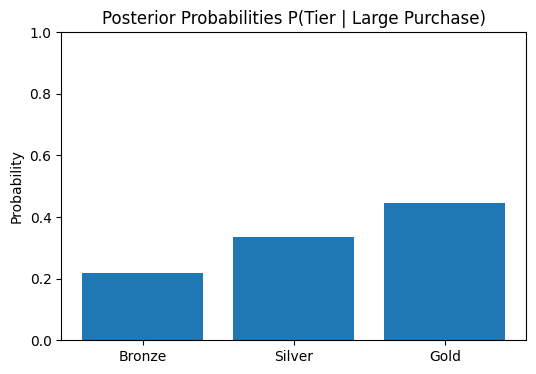

In [68]:
# -----------------------------
# 4) Visualization
# -----------------------------

# 4a) Bar plot of posterior P(tier | L)
plt.figure(figsize=(6, 4))
plt.bar(tier_labels, [P_B_given_L_emp, P_S_given_L_emp, P_G_given_L_emp])
plt.title("Posterior Probabilities P(Tier | Large Purchase)")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.show()

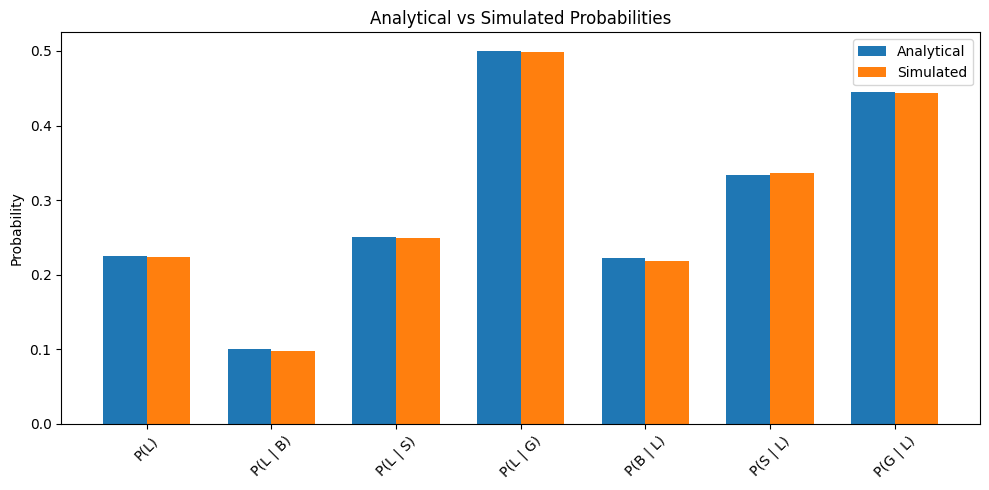

In [69]:
# 4b) Comparison plot: Analytical vs Simulated for key probabilities
labels = rows
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, analytic_vals, width, label='Analytical')
plt.bar(x + width/2, empirical_vals, width, label='Simulated')
plt.xticks(x, labels, rotation=45)
plt.ylabel("Probability")
plt.title("Analytical vs Simulated Probabilities")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
np.unique(population, return_counts=True)

(array([0, 1, 2]), array([49934, 30161, 19905], dtype=int64))